#Proyecto 2 - Modelado Optimización y Simulación

## Importación de librerias

In [67]:
# Para manejar los grafos
import networkx as nx
# Para manejar los geoJson
import geopandas as gpd
from shapely.geometry import Point, MultiPolygon

## Lectura de archivo de la malla vial de Bogotá

In [68]:
gdf = gpd.read_file('MallaBogota.geojson')
# Se tiene que descargar el archivo desde el link del documento en formato geoJSON, es demasiado pesado para subirlo al repositorio

A continuación veremos una pequeña muestra de los datos que encontramos de la malla vial, en concreto nos interesan las coordenadas puesto que estas representan intersecciones, como son de tipo 'LineString' lo que veremos es que cada fila representa una calle de la ciudad. 

In [69]:
gdf.head(10)

,OBJECTID,MVICCALZAD,MVICCAT,MVITIPO,MVINOMBRE,MVINALTERN,MVINPRINCI,MVINGENERA,MVINANTIGU,MVIETIQUET,...,MVITSUP,MVIMONIT,MVICODIGO,CREADOR,CREADOR_DATE,EDITOR,EDITOR_DATE,MVI_VELREG,Shape__Length,geometry
0,1,168175.0,18005353,KR,,,008A0000E0,05700000S0,KR 14A E,KR 8A E,...,2,0,96282,None,NaT,SIGADMIN,2014-01-22 19:06:43+00:00,30.0,0.000320,"LINESTRING (-74.09821 4.53521, -74.09846 4.53500)"
1,2,34104.0,8001090,CL,,,04200000S0,0980000000,CL 42 S,CL 42 S,...,6,0,62558,None,NaT,SIGADMIN,2014-01-22 17:48:21+00:00,30.0,0.000233,"LINESTRING (-74.17653 4.64671, -74.17666 4.64690)"
2,3,34338.0,2000900,TV,,,00600000E0,0970000000,TV 6 E,TV 6 E,...,1,0,33964,None,NaT,SIGADMIN,2014-01-22 18:52:11+00:00,NaN,0.000862,"LINESTRING (-74.02180 4.66853, -74.02161 4.66937)"
3,4,3192.0,1000290,CL,,,183B000000,0080000000,CL 183B,CL 183B,...,6,0,29147,None,NaT,SIGADMIN,2014-01-22 19:20:55+00:00,30.0,0.001055,"LINESTRING (-74.02901 4.76098, -74.02910 4.760..."
4,5,33331.0,8001681,KR,,,0810000000,008A000000,KR 84D,KR 81,...,12,0,133742,None,NaT,SIGADMIN,2014-01-22 18:26:11+00:00,30.0,0.000533,"LINESTRING (-74.14690 4.64391, -74.14651 4.64427)"
5,6,135781.0,19001473,CL,,,0630BIS0S0,075A000000,CL 63BIS S,CL 63BIS S,...,12,0,109127,None,NaT,SIGADMIN,2014-01-22 19:07:23+00:00,30.0,0.000069,"LINESTRING (-74.17558 4.58640, -74.17564 4.58639)"
6,7,NaN,4004372,KR,,,007A0000E0,04200000S0,KR 7A E,KR 7A E,...,12,0,121922,None,NaT,SIGADMIN,2014-01-22 17:14:04+00:00,30.0,0.000584,"LINESTRING (-74.08996 4.54753, -74.09015 4.54698)"
7,8,139545.0,8004308,AK,AVENIDA DEL CONGRESO EUCARISTICO,,0680000000,0100000000,AK 68,AK 68,...,12,0,12978,None,NaT,SIGADMIN,2014-01-22 18:25:35+00:00,60.0,0.002061,"LINESTRING (-74.12113 4.63247, -74.12034 4.63437)"
8,9,231456.0,8007913,TV,,,073F000000,039C0000S0,TV 75,TV 73F,...,1,0,85361,None,NaT,SIGADMIN,2014-01-22 18:11:56+00:00,30.0,0.000490,"LINESTRING (-74.15248 4.61816, -74.15297 4.61809)"
9,10,4410.0,1005528,AK,AVENIDA PASEO DE LOS LIBERTADORES,AUTOPISTA NORTE,0450000000,1680000000,AK 13,AK 45,...,12,0,4545,None,NaT,SIGADMIN,2014-01-22 17:45:14+00:00,60.0,0.000466,"LINESTRING (-74.04652 4.74930, -74.04656 4.74977)"


## Lectura del archivo de índices de seguridad en Bogotá

In [70]:
poligonos = gpd.read_file('DAILoc.geojson')

In [71]:
poligonos.head(10)

,CMIULOCAL,CMNOMLOCAL,CMMES,CMH18CONT,CMH19CONT,CMH20CONT,CMHVAR,CMHTOTAL,CMLP18CONT,CMLP19CONT,...,CMHA24CONT,CMHB24CONT,CMHCE24CON,CMHM24CONT,CMHC24CONT,CMDS24CONT,CMVI24CONT,SHAPE_AREA,SHAPE_LEN,geometry
0,09,Fontibón,Ene-Dic,19.0,27.0,22.0,-39.62,1084.0,1083.0,808.0,...,29.0,108.0,463.0,48.0,78.0,30.0,230.0,0.002710,0.321915,"MULTIPOLYGON (((-74.15857 4.66274, -74.15848 4..."
1,02,Chapinero,Ene-Dic,10.0,15.0,9.0,-46.67,1084.0,799.0,627.0,...,9.0,39.0,464.0,7.0,93.0,16.0,139.0,0.003095,0.333966,"MULTIPOLYGON (((-74.01116 4.66459, -74.01154 4..."
2,20,Sumapaz,Ene-Dic,0.0,0.0,1.0,50.00,1084.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063549,1.914949,"MULTIPOLYGON (((-74.20584 4.26966, -74.20584 4..."
3,18,Rafael Uribe Uribe,Ene-Dic,70.0,61.0,86.0,-51.25,1084.0,1601.0,1483.0,...,45.0,16.0,205.0,45.0,43.0,43.0,337.0,0.001126,0.174513,"MULTIPOLYGON (((-74.12803 4.59254, -74.12777 4..."
4,17,Candelaria,Ene-Dic,3.0,2.0,3.0,60.00,1084.0,242.0,266.0,...,1.0,2.0,54.0,1.0,11.0,5.0,12.0,0.000168,0.067158,"MULTIPOLYGON (((-74.06621 4.60317, -74.06620 4..."
5,12,Barrios Unidos,Ene-Dic,12.0,9.0,9.0,-29.17,1084.0,751.0,565.0,...,14.0,53.0,321.0,14.0,55.0,24.0,173.0,0.000969,0.121180,"MULTIPOLYGON (((-74.05725 4.68684, -74.06249 4..."
6,13,Teusaquillo,Ene-Dic,6.0,4.0,5.0,-55.17,1084.0,743.0,421.0,...,16.0,51.0,358.0,19.0,68.0,30.0,84.0,0.001156,0.148314,"MULTIPOLYGON (((-74.09372 4.66607, -74.09332 4..."
7,16,Puente Aranda,Ene-Dic,26.0,35.0,45.0,-61.90,1084.0,1249.0,986.0,...,60.0,26.0,230.0,32.0,53.0,20.0,137.0,0.001410,0.161116,"MULTIPOLYGON (((-74.11830 4.63741, -74.11504 4..."
8,14,Los Mártires,Ene-Dic,55.0,66.0,52.0,-51.02,1084.0,1057.0,597.0,...,11.0,14.0,222.0,12.0,65.0,37.0,124.0,0.000530,0.099382,"MULTIPOLYGON (((-74.07283 4.61542, -74.07311 4..."
9,01,Usaquén,Ene-Dic,36.0,33.0,50.0,-48.53,1084.0,1249.0,917.0,...,12.0,59.0,445.0,16.0,129.0,32.0,333.0,0.005310,0.436907,"MULTIPOLYGON (((-74.01116 4.66459, -74.01117 4..."


A continuación verémos una pequeña muestra de los polígonos, las variables que nos interesan son las que tienen el conteo de ciertos delitos en específico que pueden afectar las estadísticas de seguridad en Bogotá, estas son: 

- Total Hurto Celulares Año Actual
- Total Hurto Bicicletas Año Actual
- Total Hurto Personas 

Que están representadas en las variables respectivamente: 

- CMHCE20CON
- CMHB21CONT
- CMHP2OCONT

Estas variables son variables numéricas que representan la cantidad de delitos reportados en la localidad representada en el polígono mas recientes que encontramos en la fuente de datos. Siendo estas del año 2020, 2021 y 2020 respectivamente.



In [72]:
columnasDeseadas = ['CMNOMLOCAL', 'CMIULOCAL' ,'CMHCE20CON','CMHB21CONT','CMHP20CONT']

In [73]:
poligonos[columnasDeseadas]

,CMNOMLOCAL,CMIULOCAL,CMHCE20CON,CMHB21CONT,CMHP20CONT
0,Fontibón,09,3136.0,672.0,5305.0
1,Chapinero,02,3292.0,285.0,5369.0
2,Sumapaz,20,0.0,0.0,2.0
3,Rafael Uribe Uribe,18,1950.0,217.0,2990.0
4,Candelaria,17,419.0,37.0,781.0
5,Barrios Unidos,12,1981.0,435.0,3279.0
6,Teusaquillo,13,2313.0,477.0,3931.0
7,Puente Aranda,16,2622.0,413.0,4257.0
8,Los Mártires,14,1968.0,270.0,3362.0
9,Usaquén,01,3499.0,545.0,6144.0


## Manejo de los datos de seguridad en Bogotá


Vamos a crear una columnca calculada que muestre el total de delitos de estos tres tipos en cada localidad

In [74]:
columnasASumar = ['CMHCE20CON','CMHB21CONT','CMHP20CONT']

Creamos un diccionario el cual tendra como clave el nombre de la localidad, y como valores un array en donde la primera poisición es el total de delitos en esa localidad y en la segunda se tendra el multipoligono que representa dicha localidad. El multipoligono sera útil mas adelante para poder determinar si un enlace de la malla vial se encuentra dentro de dicha zona y asi asignarle su respectivo peso de inseguridad.

In [75]:
sumas = []
delitos_localidad = {}
for index, row in poligonos.iterrows():
    nombre_loc = row['CMNOMLOCAL']
    geometry_loc = row['geometry']
    multipoligono_locaidad = MultiPolygon(geometry_loc)
    suma = 0
    for columna in columnasASumar:
        suma += int(row[columna])

    #print(nombre_loc,suma)
    delitos_localidad[nombre_loc] = [int(suma), multipoligono_locaidad]
    sumas.append(suma)
# Agregar la nueva columna
poligonos['TotalDelitos'] = sumas
    

Ya que tenemos las columnas deseadas podemos ver ahora qué valor de delincuencia tiene cada nodo:

In [76]:
columnasAMostrar = ['CMNOMLOCAL', 'CMIULOCAL', 'TotalDelitos']
poligonos[columnasAMostrar]

,CMNOMLOCAL,CMIULOCAL,TotalDelitos
0,Fontibón,09,9113
1,Chapinero,02,8946
2,Sumapaz,20,2
3,Rafael Uribe Uribe,18,5157
4,Candelaria,17,1237
5,Barrios Unidos,12,5695
6,Teusaquillo,13,6721
7,Puente Aranda,16,7292
8,Los Mártires,14,5600
9,Usaquén,01,10188


## Creación del grafo

Para crear el grafo vamos a colocar números aleatorios entre 2 y 16205 (rango de delitos para cada localidad) para darle una primera aproximación al modelo, debido a que por las limitaciones de los datos no es posible saber a qué localidad pertenece cada punto.

A continuación se realizara la creación del grafo usando la malla vial. Para lo cual se emplea el archivo de malla vial cargado y los delitos por localidad. Se verifica si un enlace que correspondría a una calle se encuentra dentro de dicha localidad y se le asigna su respectivo valor de inseguridad.

In [77]:

G = nx.Graph()
from shapely import LineString

def enlace_dentro_localidad(enlace, multipoligono_locaidad):
    return enlace.within(multipoligono_locaidad)

puntos = []
for index, row in gdf.iterrows():
    geometry = row['geometry']
    nodes = list(geometry.coords)
    for i in range(len(nodes) - 1):
        enlace = LineString([nodes[i], nodes[i+1]])
        for nombre_localidad in poligonos['CMNOMLOCAL']:
            multipoligono_locaidad = delitos_localidad[nombre_localidad][1]
            #print('GEOMTRY_LOC',geometry_loc)
            if enlace_dentro_localidad(enlace, multipoligono_locaidad):
                G.add_edge(nodes[i], nodes[i+1], weight= delitos_localidad[nombre_localidad][0])
                break

        

In [78]:
# Tamaño del grafo (número de nodos)
size = len(G)
print("Número de nodos:", size)

# Tamaño del grafo (número de aristas)
edges = G.number_of_edges()
print("Número de aristas:", edges)

Número de nodos: 226033
Número de aristas: 269614


Observamos las componentes conectadas del grafo para tomar una como muestra.

In [79]:
connected_components = list(nx.connected_components(G))


suma = 0
for i in range(0,30):
    suma +=len(connected_components[i])
    print(i, len(connected_components[i]))


0 18880
1 979
2 14213
3 25967
4 16202
5 8064
6 9128
7 17878
8 4493
9 23580
10 6084
11 11923
12 11029
13 3481
14 1945
15 18880
16 7699
17 5982
18 1324
19 4578
20 117
21 5465
22 1988
23 9
24 2216
25 23
26 30
27 105
28 9
29 5


Se selecciona la una de las componentes para realizar un grafo de ejemplo.

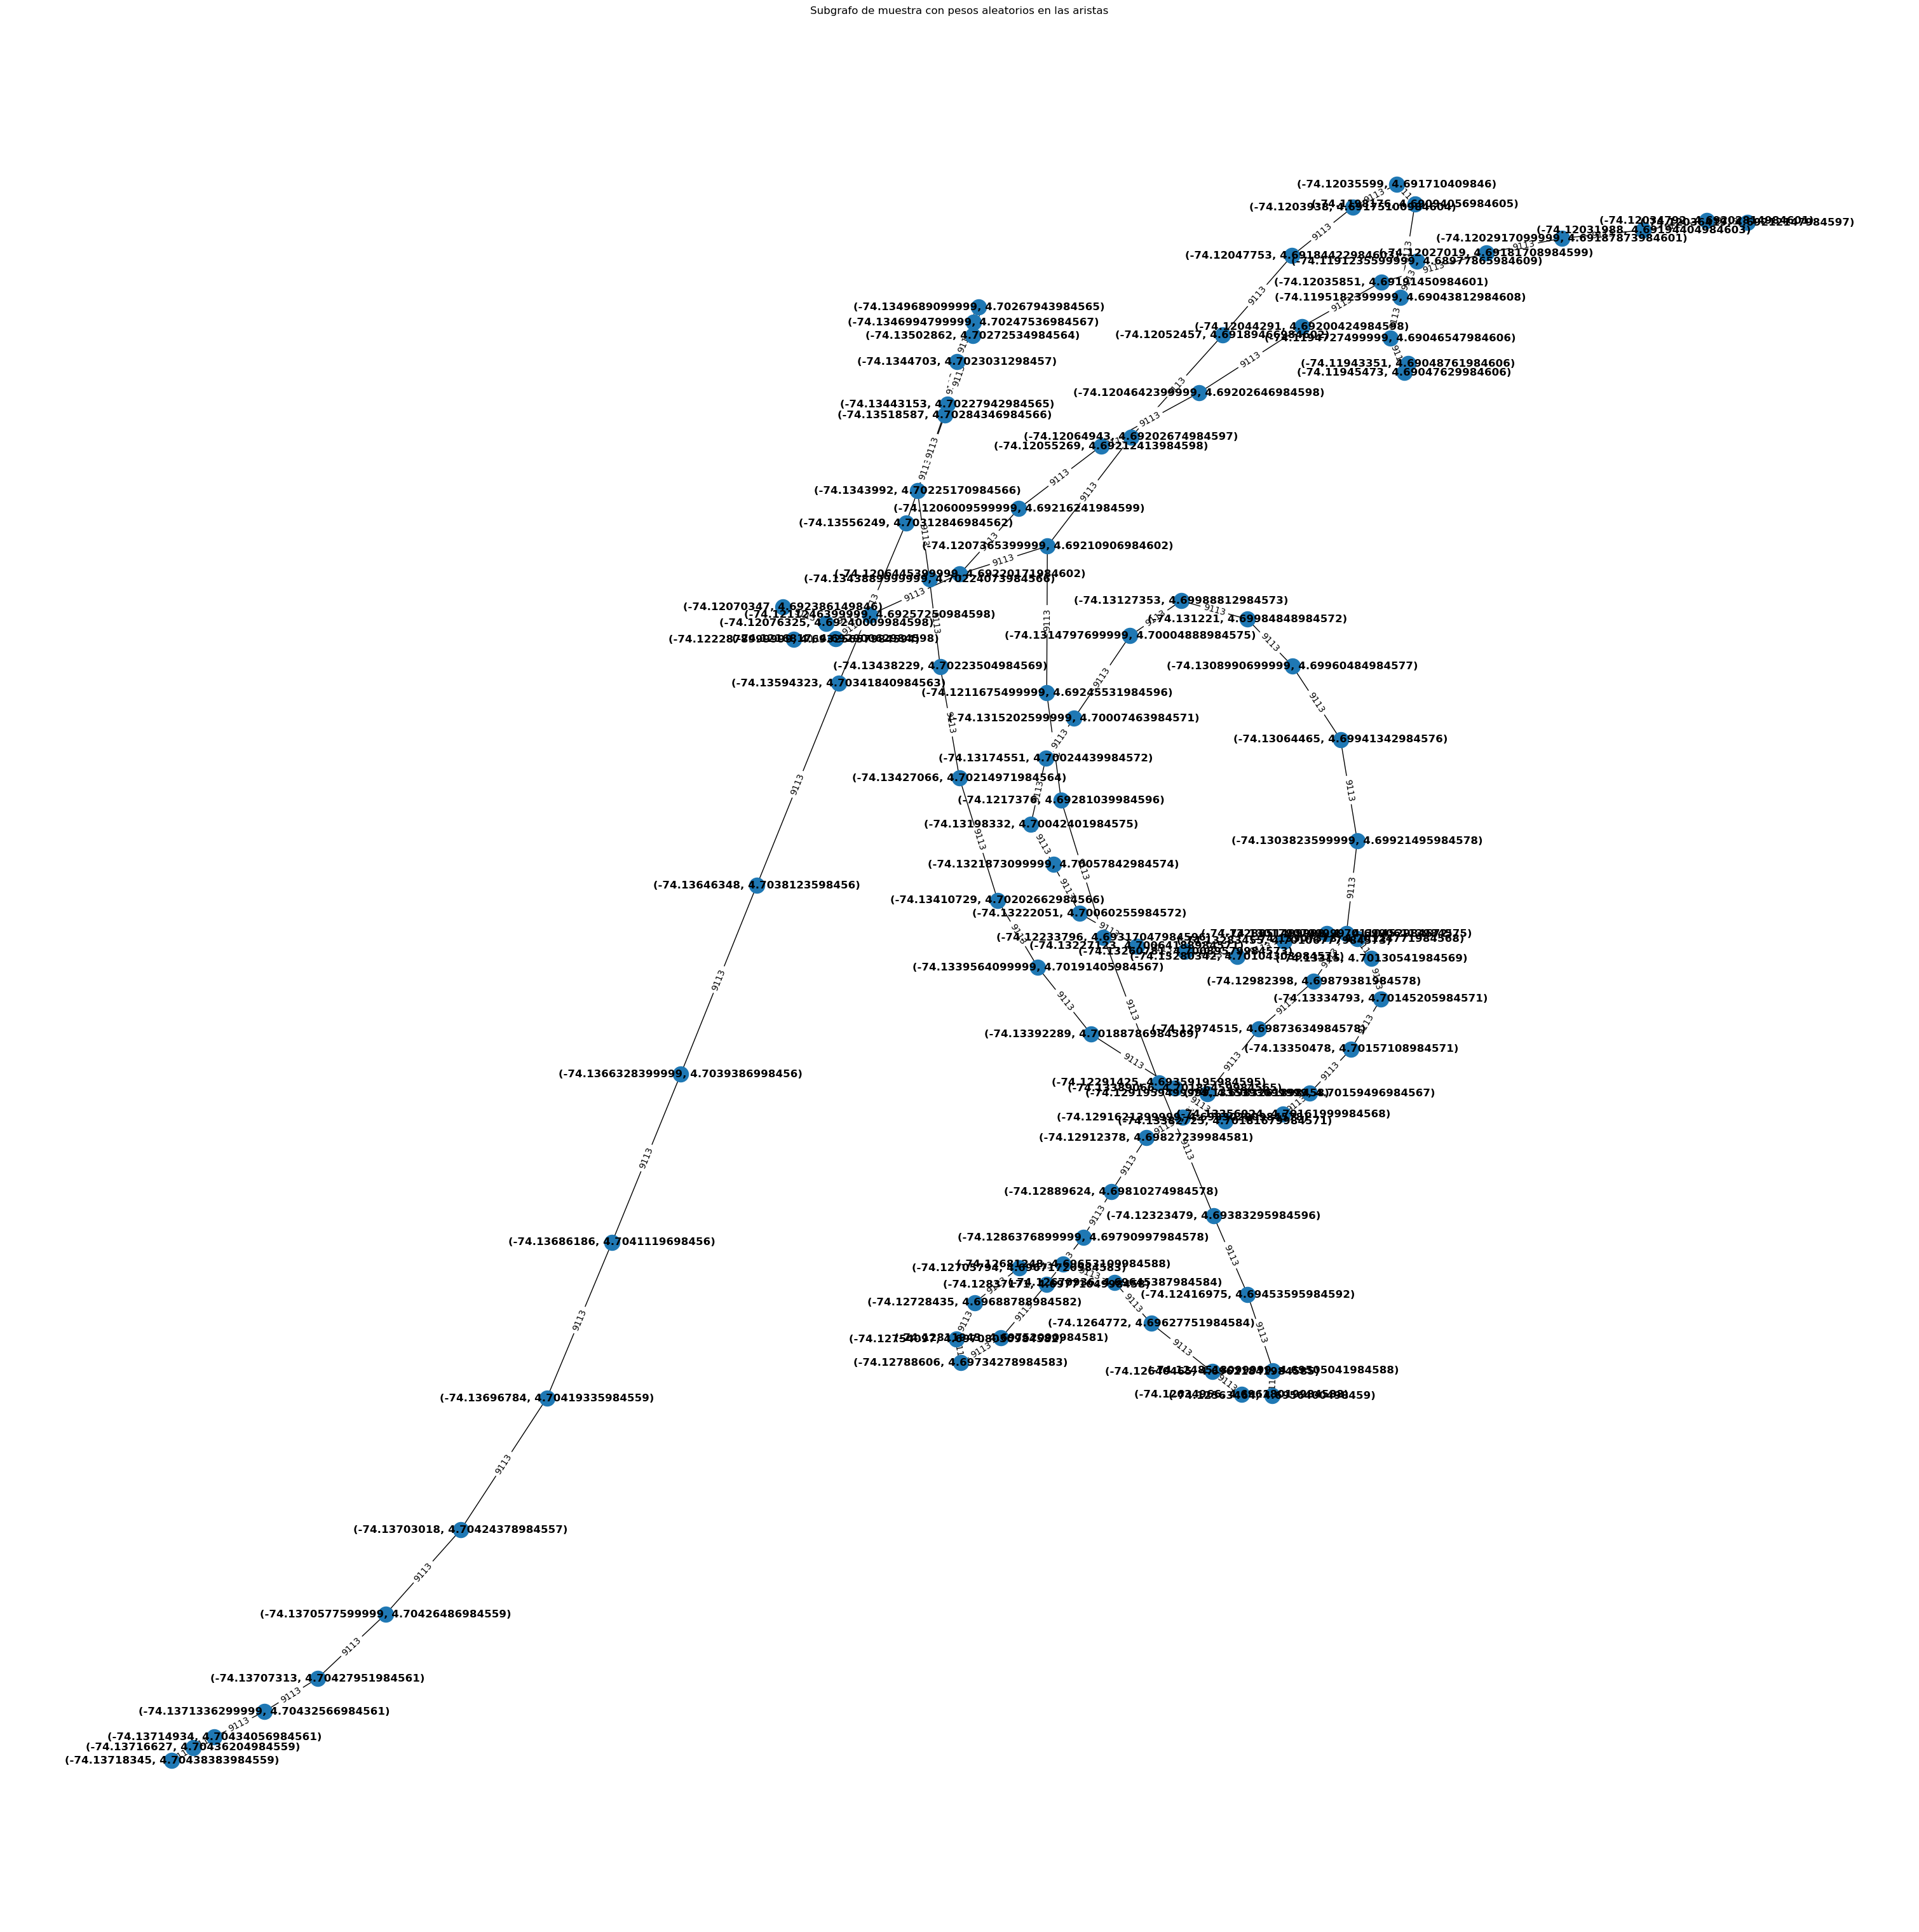

In [80]:
import matplotlib.pyplot as plt
# Obtener las componentes conectadas del grafo
connected_components = list(nx.connected_components(G))

# Seleccionar una componente conectada al azar como muestra
sample_component = connected_components[27]

# Crear un subgrafo a partir de la muestra
sample_subgraph = G.subgraph(sample_component)

# Dibujar el subgrafo de muestra
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(sample_subgraph)
nx.draw(sample_subgraph, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(sample_subgraph, pos, edge_labels={(u, v): sample_subgraph[u][v]['weight'] for u, v in sample_subgraph.edges})
plt.title("Subgrafo de muestra con pesos aleatorios en las aristas")
plt.show()

In [81]:
# Tamaño del grafo (número de nodos)
size = len(sample_subgraph)
print("Número de nodos:", size)

# Tamaño del grafo (número de aristas)
edges = sample_subgraph.number_of_edges()
print("Número de aristas:", edges)

Número de nodos: 105
Número de aristas: 105


# Modelado y optimización

Creamos un grafo nuevo basado en el subgrafo para probar el modelo, asociamos cada coordenada o nodo del grafo a un indice para de esa forma disminuir la complejidad al momento de buscar la ruta minima.

In [82]:
# Crear un nuevo grafo
grafo = nx.Graph()

# Agregar nodos con sus posiciones
nodos_dict = {}
i=1
for node in sample_subgraph.nodes():
    nodos_dict.update({node: i})
    grafo.add_node(i, pos=node)
    i += 1

# Agregar bordes con sus pesos
# Agregar bordes con sus pesos
for edge in sample_subgraph.edges():
    # Obtener el índice de los nodos en el nuevo grafo
    node1_index = nodos_dict[edge[0]]
    node2_index = nodos_dict[edge[1]]
    weight = sample_subgraph[edge[0]][edge[1]]['weight']
    grafo.add_edge(node1_index, node2_index, weight=weight)

A continuación podemos apreciarlo

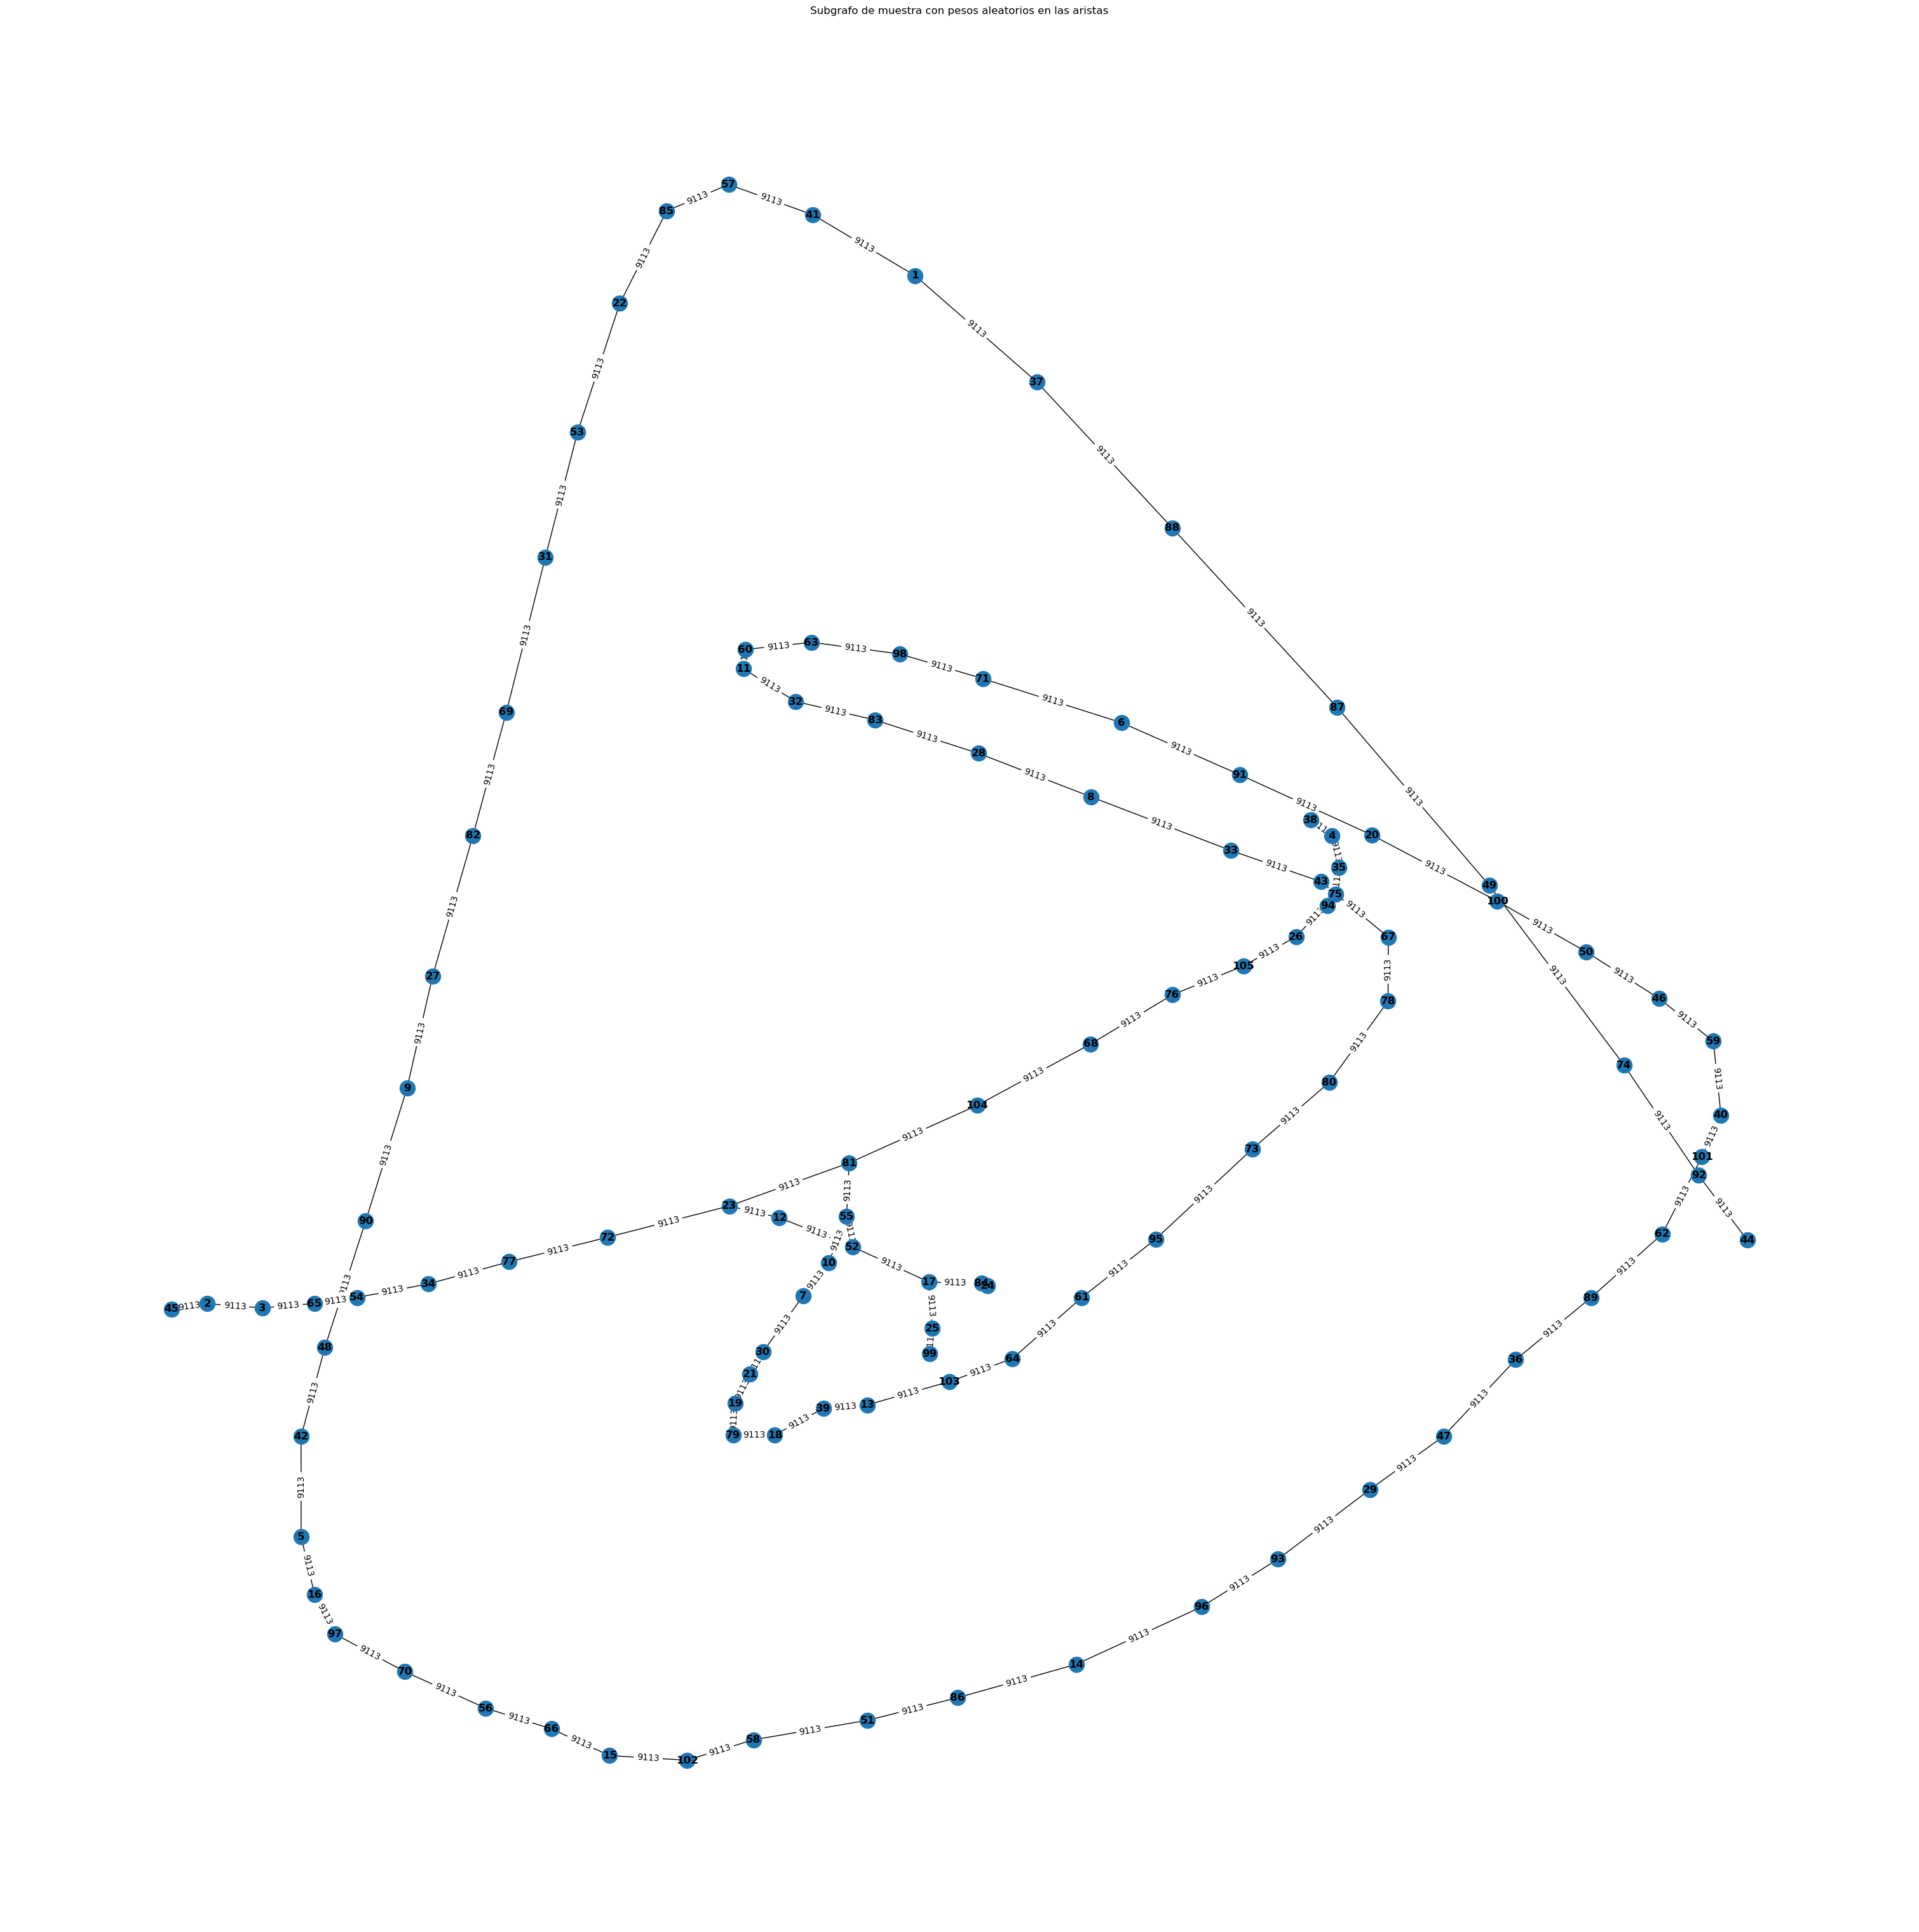

In [83]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(grafo)
nx.draw(grafo, pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(grafo, pos, edge_labels={(u, v): grafo[u][v]['weight'] for u, v in grafo.edges})
plt.title("Subgrafo de muestra con pesos aleatorios en las aristas")
plt.show()

Creamos el modelo basándonos en los trabajos del laboratorio, se tendría que modificar el origen y destino con el nodo y origen que busquemos en el diccionario.

In [84]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

nodos = grafo.nodes()
enlaces = grafo.edges()

Model = ConcreteModel()

#Nodos
numNodes = len(grafo.nodes())
Model.N=RangeSet(1,numNodes)

#Costo o peligro

Model.c =Param(Model.N, Model.N, mutable=True)

for i in Model.N:
    for j in Model.N:
        Model.c[i,j] = 99999999

for i,j in enlaces:
    #print("Enalce", i,j, grafo.edges()[(i, j)]['weight'])
    Model.c[i,j] = grafo.edges()[(i, j)]['weight']
    Model.c[j,i] = grafo.edges()[(i, j)]['weight']      

#origen y destino-----------------------------------------------------------------------
        
s = 4
d = 22
        

#variables--------------------------------------------------------------------
Model.x = Var(Model.N,Model.N, domain=Binary)

# # OBJECTIVE FUNCTIONS*************************************************************

Model.f2 = sum(Model.x[i,j] * Model.c[i,j] for i in Model.N for j in Model.N)
#Funci�n objetivo general
Model.O_z = Objective(expr= Model.f2, sense=minimize)

##Restricci�n nodo origen
def source_rule(Model,i):
    if i==s:
        return sum(Model.x[i,j] for j in Model.N)==1
    else:
        return Constraint.Skip

Model.source=Constraint(Model.N, rule=source_rule)
    
#Restricci�n nodo destino
def destination_rule(Model,j):
    if j==d:
        return sum(Model.x[i,j] for i in Model.N)==1
    else:
        return Constraint.Skip

Model.destination=Constraint(Model.N, rule=destination_rule)

#Restricci�n nodo intermedio
def intermediate_rule(Model,i):
    if i!=s and i!=d:
        return sum(Model.x[i,j] for j in Model.N) - sum(Model.x[j,i] for j in Model.N)==0
    else:
        return Constraint.Skip

Model.intermediate=Constraint(Model.N, rule=intermediate_rule)

SolverFactory('glpk').solve(Model)

for i in Model.N:
        for j in Model.N:
            if value(Model.x[i,j]) == 1:
                print(i,j)

print(value(Model.O_z))
Model.display()


4 35
22 53
35 4
53 22
36452.0
Model unknown

  Variables:
    x : Size=11025, Index=N*N
        Key        : Lower : Value : Upper : Fixed : Stale : Domain
            (1, 1) :     0 :   0.0 :     1 : False : False : Binary
            (1, 2) :     0 :   0.0 :     1 : False : False : Binary
            (1, 3) :     0 :   0.0 :     1 : False : False : Binary
            (1, 4) :     0 :   0.0 :     1 : False : False : Binary
            (1, 5) :     0 :   0.0 :     1 : False : False : Binary
            (1, 6) :     0 :   0.0 :     1 : False : False : Binary
            (1, 7) :     0 :   0.0 :     1 : False : False : Binary
            (1, 8) :     0 :   0.0 :     1 : False : False : Binary
            (1, 9) :     0 :   0.0 :     1 : False : False : Binary
           (1, 10) :     0 :   0.0 :     1 : False : False : Binary
           (1, 11) :     0 :   0.0 :     1 : False : False : Binary
           (1, 12) :     0 :   0.0 :     1 : False : False : Binary
           (1, 13) :     0 :